<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/ML/Agg_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agglomerative** Hierarchical Clustering

### Importing the necessary modules

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering as aggcluster

### Importing the dataset

In [ ]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.65MB/s]


In [ ]:
df = pd.read_csv(r"/content/customer-segmentation-tutorial-in-python.zip")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

### Data for clustering
We are taking into consideration the `Annual Income` and `Spending Score` columns for clustering.

In [ ]:
data = df.iloc[:, 3:]
data.values[:1]

array([[15, 39]])

### Plotting the **Dendrogram**

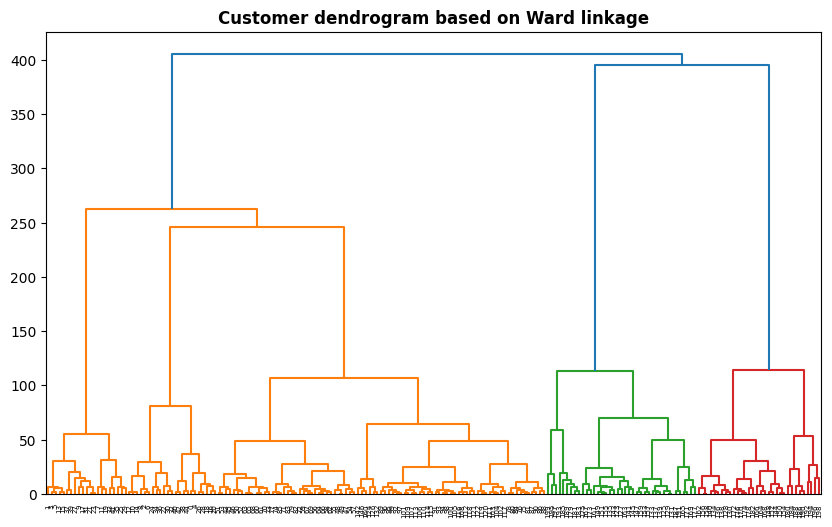

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Customer dendrogram based on Ward linkage", fontweight='bold')
shc.dendrogram(shc.linkage(data, method='ward'))

plt.show()

### **Clustering**
Using `ward` linkage for clustering the datapoints into **5** clusters.

In [ ]:
cluster = aggcluster(n_clusters=5, metric='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(data)

np.unique(cluster_labels)

array([0, 1, 2, 3, 4])

### **Plotting** the clusters

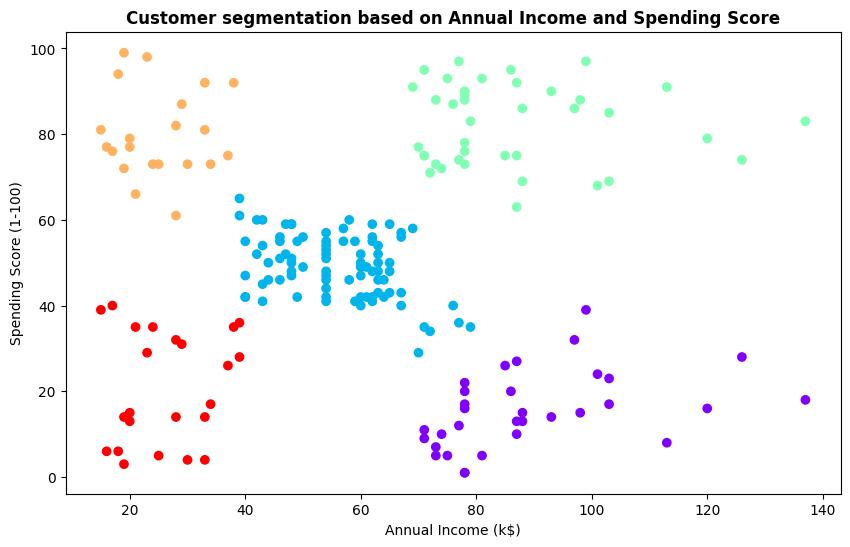

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], c=cluster.labels_, cmap='rainbow')

plt.title("Customer segmentation based on Annual Income and Spending Score", fontweight='bold')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.show()